# Title: RMDL and Roberta BERT for text classification

#### Individual's Name : Harjeet Kaur

####  Emails : kaur.harjeet3092@gmail.com

### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
This project aims to investigate the effectiveness of the XGBoost algorithm for detecting attacks 
and anomalies in Internet of Things (IoT) sensor data at IoT sites in the paper "Attack-and-Anomaly-Detection-in-IoT-Sensors-in-IoT-Sites-Using-Machine-Learning-Approaches" released in 2019.
*********************************************************************************************************************
#### Github Repo: 
xxxxx
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
This paper performance of machine learning models are used to predict detecting attacks and anomalies in Internet of Things (IoT)sensor data at IoT sites accurately.
#### PROBLEM STATEMENT :
* Try to replicate the results given in paper on text classification datasets with XGBoost models
* choose 1 standard datsets : [Dataset link ](https://github.com/Shauqi/Attack-and-Anomaly-Detection-in-IoT-Sensors-in-IoT-Sites-Using-Machine-Learning-Approaches/blob/master/df_spark.csv) 
* To assess the effectivness of XGBoost, on classified dataset 
* To compare the performance of XGBoost, with the SVM, LR,DT, RF, ANN on the above-mentioned dataset.
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
*  The security challenges of the Internet of ThingsIoT sensor networks which are being deployed in internet sites. 
*The sensors deployed in these networks are at risk from a number of security threats and attacks such as unauthorised access, data breach or misappropriation due to the increasing adoption of Internet of Things technologies across different sectors.
*********************************************************************************************************************
#### SOLUTION:
* The proposed approach uses a basic concept of classification
* Apply XGboost to enhance the prediction accuracy.


 # Methodology
*********************************************************************************************************************

* Data Loading and Preprocessing
1. Load the IoT sensor dataset (df_spark.csv) and drop unnecessary columns.
2. Separate the target variable (y) and features (X) from the dataset.
3. Binarize the target labels using the label_binarize function.
Dataset Splitting
1. Split the dataset into training and testing sets using a 80-20 ratio.
2. Define the number of classes (n_classes) for multi-class classification.
XGBoost Pipeline Creation
1. Create an XGBoost pipeline using StandardScaler for feature scaling and 
OneVsRestClassifier with XGBoost as the base model.
Model Training and Prediction
1. Fit the XGBoost pipeline to the training data.
2. Predict class probabilities for the test data using the trained model.
ROC Curve Analysis
1. Calculate ROC curves and AUC scores for each class using the roc_curve and auc
functions.
2. Visualize ROC curves for each class using matplotlib.
3. Plot the ROC curve for each class, including area under the curve (AUC) values.
Accuracy Calculation
1. Predict class labels for the test data.
2. Calculate and display the overall accuracy using the accuracy_score function.
Results Visualization
1. Display the ROC curve plot using matplotlib.
2. Show the calculated accuracy score.


# Implementation

Accuracy: 0.994119208258252


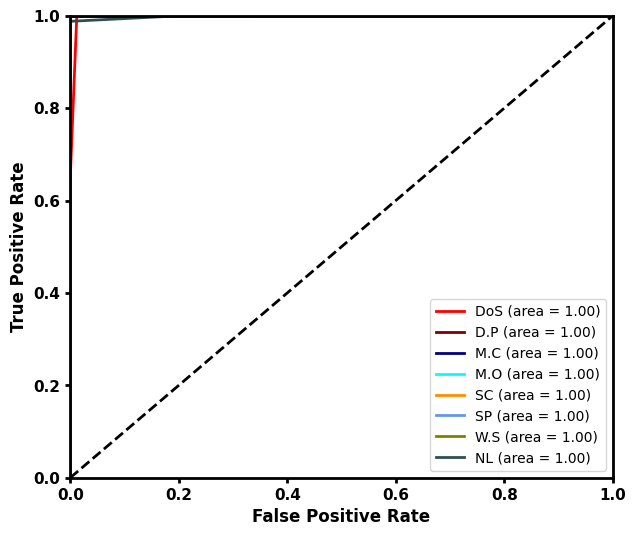

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Load the dataset
df_spark = pd.read_csv('df_spark.csv')
df_spark = df_spark.drop(columns="Unnamed: 0")

# Separate features (X) and target (y)
y = df_spark.iloc[:, 0].values
X = df_spark.iloc[:, 1:].values

# Binarize the labels
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create an XGBoost pipeline
pipe_xgb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(xgb.XGBClassifier(objective='binary:logistic', random_state=0)))
])

# Fit the XGBoost model
pipe_xgb = pipe_xgb.fit(X_train, y_train)

# Predict probabilities for test data
y_score_xgb = pipe_xgb.predict_proba(X_test)

# Calculate ROC curves and AUC for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Calculate accuracy score
y_pred_xgb = pipe_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Plot ROC curves
lw = 2
classes = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]
plt.figure(figsize=(7, 6))
ax = plt.subplot(111)
colors = cycle(['red', 'maroon', 'navy', 'aqua', 'darkorange', 'cornflowerblue', 'olive', 'darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_XGBoost")



# Graphical Representation

In [ ]:
# Display the accuracy score
plt.show()


# Conclusion and Future Direction :
Project Summary
This project demonstrates the application of the XGBoost algorithm for detecting attacks and 
anomalies in IoT sensor data collected at various IoT sites. The methodology involves data 
preprocessing, model training, and evaluation using ROC curve analysis and accuracy 
calculation.
Insights and Implications
The ROC curve analysis provides insights into the model's performance for different classes, 
helping to identify potential strengths and weaknesses. The accuracy score offers an overall 
measure of the model's effectiveness in detecting IoT sensor anomalies.
Future Directions
Future work could involve hyperparameter tuning to optimize model performance further and 
exploring additional feature engineering techniques. Additionally, the project could be extended 
to consider other machine learning algorithms and ensemble methods for comparison.



# References :
